In [24]:
import pandas as pd
import numpy as np
import plotly
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn import datasets

In [25]:
arrests = pd.read_csv("/Users/arnet/Desktop/Ironhack/GitHub/BCNDATA1021/ClassMaterials/Week7/USArrests.csv")

In [26]:
arrests.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [27]:
arrests

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


array([[<AxesSubplot:title={'center':'Murder'}>,
        <AxesSubplot:title={'center':'Assault'}>],
       [<AxesSubplot:title={'center':'UrbanPop'}>,
        <AxesSubplot:title={'center':'Rape'}>]], dtype=object)

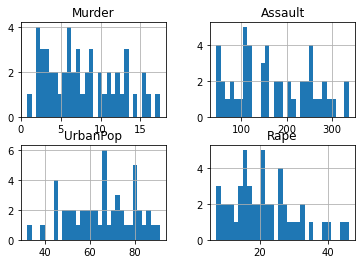

In [28]:
arrests.hist(bins=30)

#### Kmeans restrictions
- everything must be numerical
- ideally similar scales

In [29]:
# reshape - state to index
arrests.index = arrests.iloc[:,0]

In [30]:
arrests = arrests.iloc[:, 1:5]

In [31]:
# delete header name for index
arrests.rename_axis(None, inplace=True)

In [32]:
arrests.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


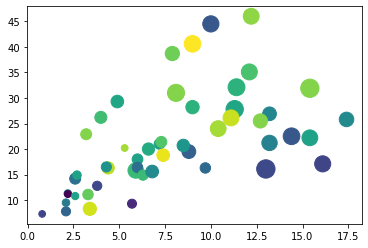

In [33]:
plt.scatter(arrests.iloc[:,0], arrests.iloc[:,3], arrests.iloc[:,1], arrests.iloc[:,2],)

In [34]:
# Apply clustering
kmeans = KMeans(n_clusters = 4)

In [35]:
cluster = kmeans.fit(arrests)

In [36]:
cluster.cluster_centers_

array([[  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ]])

In [37]:
cluster.labels_

array([1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 0, 3, 1, 3, 0, 3, 3, 1, 0, 1, 2, 1,
       0, 1, 2, 3, 3, 1, 0, 2, 1, 1, 1, 0, 3, 2, 2, 3, 2, 1, 0, 2, 2, 3,
       0, 2, 2, 0, 0, 2])

In [38]:
#arrests['cluster'] = cluster.labels_

In [39]:
#arrests.head()

In [40]:
#plt.scatter(arrests.iloc[:,0], arrests.iloc[:,2], c=arrests.iloc[:,4])

In [41]:
'''markersize = arrests['Rape']
markercolour = arrests['cluster']

fig1 = go.Scatter3d(x=arrests['Murder'], 
                    y = arrests['Rape'],
                    z = arrests['Assault'],
                   marker = dict(size = markersize,
                                color = markercolour,
                                opacity = 0.9,
                                colorscale = 'Blues'), 
                   line = dict(width = 0.2),
                   mode= 'markers')
#make layout
mylayout = go.Layout(scene=dict(xaxis=dict(title='Murder'), yaxis=dict(title='Rape'), zaxis = dict(title='Assaults')))'''

KeyError: 'cluster'

In [ ]:
plotly.offline.plot({'data': [fig1], 
                     'layout': mylayout},
                   auto_open = True,
                   filename="5Dplot.html")

### Scaling the data

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
arrests_scaled=StandardScaler().fit_transform(arrests)

In [44]:
arrests_scaled_df = pd.DataFrame(arrests_scaled, columns = ('murder', 'assault', 'UrbanPop', 'rape')) 

array([[<AxesSubplot:title={'center':'murder'}>,
        <AxesSubplot:title={'center':'assault'}>],
       [<AxesSubplot:title={'center':'UrbanPop'}>,
        <AxesSubplot:title={'center':'rape'}>]], dtype=object)

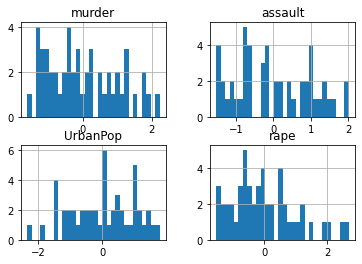

In [45]:
arrests_scaled_df.hist(bins=30)

### Activity
- fit kmeans to dataframe (make numeric, maybe scale)

In [46]:
kmeans.inertia_

34728.629357142854

## Scaled

In [60]:
K1= range(10, 50)
inertia = []
for k in K1:
    kmeans = KMeans(n_clusters= k, random_state = 0)
    kmeans.fit(arrests_scaled)
    inertia.append(kmeans.inertia_)
inertia

[28.31163939712256,
 24.316560656810115,
 23.545753931991364,
 20.93890932564648,
 19.652589827429463,
 18.460437052999335,
 16.451353116439563,
 15.52566713775452,
 14.736024808679375,
 14.092898891953501,
 13.250261254319426,
 11.912948158159061,
 11.15169880693247,
 10.635855761112513,
 9.646929188678508,
 9.00824959296876,
 8.44757478917233,
 7.698994713515358,
 6.727880803428646,
 6.070926458805205,
 5.69564232923924,
 5.327102180334475,
 4.8119737726584635,
 4.070341605648908,
 3.694720801940912,
 3.2555984107511238,
 3.008254001225608,
 2.680832656756375,
 2.3541251258370135,
 1.8191871541677807,
 1.554711042733869,
 1.296878366223929,
 1.0375961630257402,
 0.7848523123630852,
 0.6051160797603333,
 0.44879263157804766,
 0.3025468891721447,
 0.17799678891872603,
 0.08419846325619629,
 0.021620311482937714]

([<matplotlib.axis.XTick at 0x1fa5fcc3a90>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

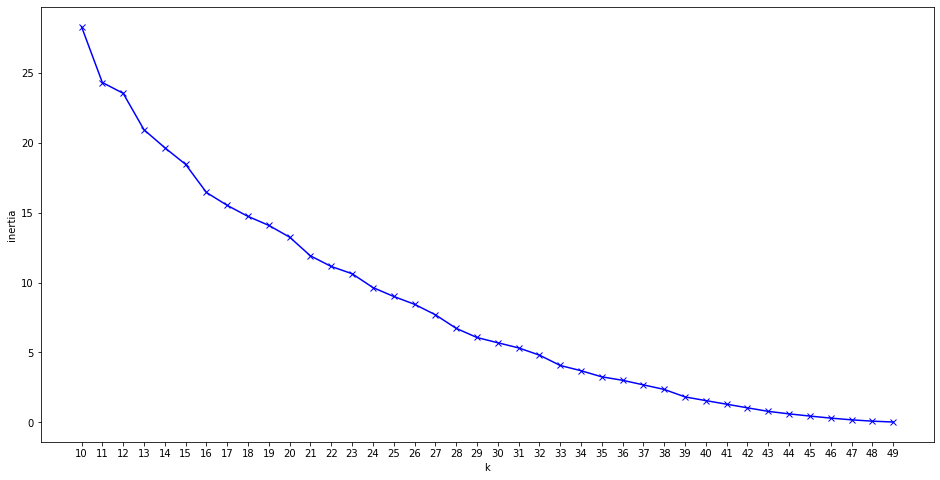

In [61]:
# Plot elbow plot
plt.figure(figsize=(16,8))
plt.plot(K1, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K1), max(K1)+1,1.0))

In [55]:
from sklearn.metrics import silhouette_score
K2 = range(10, 30)
sil = []

for k in K2:
  kmeans = KMeans(n_clusters = k).fit(arrests_scaled)
  labels = kmeans.labels_
  sil.append(silhouette_score(arrests_scaled, labels, metric = 'euclidean'))
sil

[0.26711900728385646,
 0.25882224872849485,
 0.2522872974642293,
 0.23640295426023325,
 0.2495743303517851,
 0.2287673210023814,
 0.23354329681558486,
 0.22077211402095537,
 0.22476201275762217,
 0.232991265039085,
 0.223650767792038,
 0.19271026256380563,
 0.20115126343831574,
 0.22293903539101936,
 0.18931584075523947,
 0.15961971253413892,
 0.15812513492031832,
 0.16008531115044028,
 0.15381774881270685,
 0.13511729672061476]

([<matplotlib.axis.XTick at 0x1fa603132e0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

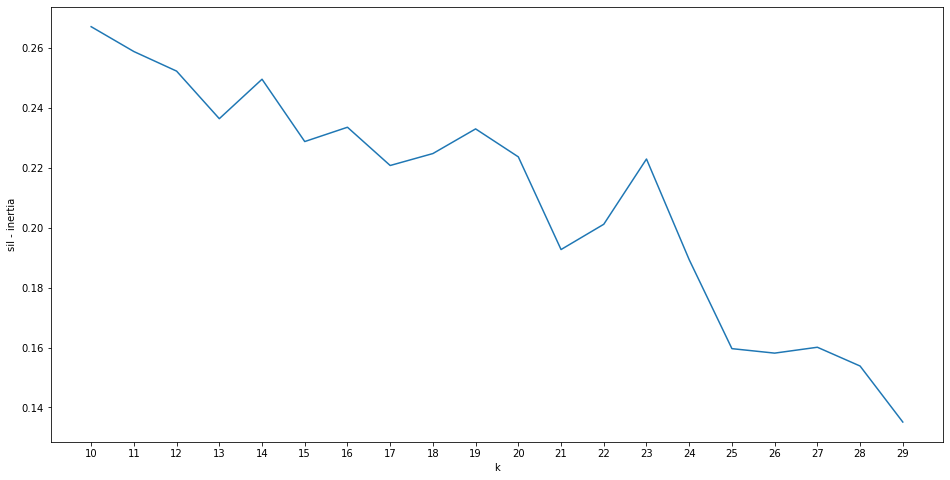

In [59]:
plt.figure(figsize=(16,8))
#plt.plot(K1, inertia, label='inertia')
plt.plot(K2, sil, label='sil')
plt.xlabel('k')
plt.ylabel('sil')
plt.xticks(np.arange(min(K2), max(K2)+1,1.0))



In [ ]:
sil